<a href="https://colab.research.google.com/github/minmings111/AICA_study/blob/main/AICA_2025_08_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 2025.08.13. --1

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
df = pd.read_csv('./data/wine.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [6]:
model = Sequential()

# Dense: 은닉층 안의 노드 수. 너무 많으면 과적합, 적으면 학습불가.
# 은닉층이 너무 많아도 과적합, 기울기 소실 문제 발생 가능성 있음.
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 500, validation_split = 0.25)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.2383 - loss: 11.6757 - val_accuracy: 0.2431 - val_loss: 6.3339
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2404 - loss: 5.0183 - val_accuracy: 0.2692 - val_loss: 1.7277
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3327 - loss: 1.2365 - val_accuracy: 0.7915 - val_loss: 0.5675
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7963 - loss: 0.5506 - val_accuracy: 0.8000 - val_loss: 0.5248
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8080 - loss: 0.5132 - val_accuracy: 0.8277 - val_loss: 0.4737
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8222 - loss: 0.4592 - val_accuracy: 0.8385 - val_loss: 0.3993
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8349 - loss: 0.3928 - val_accuracy: 0.8623 - val_loss: 0.3323
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8690 - loss: 0.3275 - val_accuracy: 0.9085 - val_loss: 0.2705

In [9]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9374 - loss: 0.1893
Test loss: 0.1910824030637741
Test accuracy: 0.9323077201843262


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

In [11]:
modelpath = './data/model/all/all-{epoch:02d}-{val_loss:.4f}.keras'
checkpointer = ModelCheckpoint(filepath = modelpath, verbose=1)

In [12]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 500,
                    validation_split = 0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/all-01-0.1839.keras

Epoch 2: saving model to ./data/model/all/all-02-0.1809.keras

Epoch 3: saving model to ./data/model/all/all-03-0.1776.keras

Epoch 4: saving model to ./data/model/all/all-04-0.1751.keras

Epoch 5: saving model to ./data/model/all/all-05-0.1717.keras

Epoch 6: saving model to ./data/model/all/all-06-0.1685.keras

Epoch 7: saving model to ./data/model/all/all-07-0.1710.keras

Epoch 8: saving model to ./data/model/all/all-08-0.1635.keras

Epoch 9: saving model to ./data/model/all/all-09-0.1615.keras

Epoch 10: saving model to ./data/model/all/all-10-0.1589.keras

Epoch 11: saving model to ./data/model/all/all-11-0.1564.keras

Epoch 12: saving model to ./data/model/all/all-12-0.1545.keras

Epoch 13: saving model to ./data/model/all/all-13-0.1526.keras

Epoch 14: saving model to ./data/model/all/all-14-0.1515.keras

Epoch 15: saving model to ./data/model/all/all-15-0.1486.keras

Epoch 16: saving model to ./data/model/all/all-1

In [13]:
# overfit
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500,
                    validation_split = 0.25, verbose=0)

In [14]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.939697,0.159928,0.949231,0.140829
1,0.940980,0.158570,0.951538,0.136534
2,0.940210,0.156083,0.952308,0.135092
3,0.942007,0.154957,0.950769,0.134947
4,0.941237,0.153290,0.952308,0.131815


In [15]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

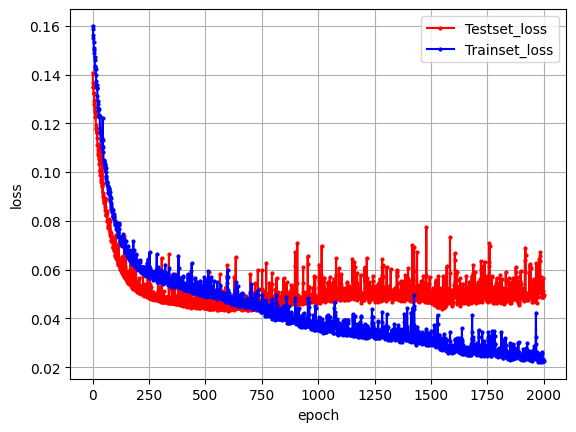

In [16]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='o', c='red', markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, marker='o', c='blue', markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# 2025.08.13. --2

df = pd.read_csv('./data/wine.csv', header=None)

X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = './data/model/bestmodel.keras'
checkpointer = ModelCheckpoint(filepath = modelpath, verbose=0,
                               monitor='val_loss', save_best_only=True)

# 성능이 나빠지면 중단되기 때문에 2000번이 다 돌지 않음.
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500,
                    validation_split = 0.25, verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7717 - loss: 0.7970 - val_accuracy: 0.8662 - val_loss: 0.3073
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8837 - loss: 0.3383 - val_accuracy: 0.9254 - val_loss: 0.2997
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9056 - loss: 0.3076 - val_accuracy: 0.8869 - val_loss: 0.2843
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8859 - loss: 0.3077 - val_accuracy: 0.9208 - val_loss: 0.2576
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9143 - loss: 0.2852 - val_accuracy: 0.9285 - val_loss: 0.2419
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9160 - loss: 0.2665 - val_accuracy: 0.9308 - val_loss: 0.2281
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9222 - loss: 0.2548 - val_accuracy: 0.9331 - val_loss: 0.2180
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9230 - loss: 0.2515 - val_accuracy: 0.9338 - v

In [21]:
# 최적의 모델~ 엄청난 정확도~~
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0364
Test loss: 0.06305000931024551
Test accuracy: 0.983846127986908


In [20]:
# 2025.08.13. --3
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from numpy import array

In [22]:
text = '해보지 않으면 해낼 수 없다'

result = text_to_word_sequence(text)
print("\n원문:\n", text)
print("\n토큰화:\n", result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


In [23]:
docs = [
    '먼저 텍스트의 각 단어를 나누어 토큰화를 합니다.',
    '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
    '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.'
]

token = Tokenizer()
token.fit_on_texts(docs)

print('\n단어 카운트:\n', token.word_counts)
print('\n문장 카운트:\n', token.document_count)
print('\n각 단어에 매겨진 인덱스 값:\n', token.word_index)


단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화를', 1), ('합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트:
 3

각 단어에 매겨진 인덱스 값:
 {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화를': 7, '합니다': 8, '단어로': 9, '토큰화해야': 10, '인식됩니다': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


In [24]:
## one-hot incoding

text = '오랫동안 꿈꾸는 이는 그 꿈을 닮아간다'
token = Tokenizer()
token.fit_on_texts([text])
print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [25]:
x = token.texts_to_sequences([text])
print(x)

[[1, 2, 3, 4, 5, 6]]


In [26]:
word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes = word_size)
print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


In [27]:
# 학습데이터
docs = [
    '너무 재밌네요', '최고예요', '참 잘 만든 영화예요', '추천하고 싶은 영화입니다', '한번 더 보고싶네요',
    '글쎄요', '별로예요', '생각보다 지루하네요', '연기가 어색해요', '재미없어요'
]

# 정답데이터 // 긍정은 1, 부정은 0
classes = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [28]:
x = token.texts_to_sequences(docs)
print('\n리뷰 텍스트, 토큰화 결과: \n', x)


리뷰 텍스트, 토큰화 결과: 
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [29]:
padded_x = pad_sequences(x, 4)
print('\n패딩결과: \n', padded_x)


패딩결과: 
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


In [30]:
# 2025.08.14. --1

word_size = len(token.word_index) + 1

model = Sequential()
model.add(Embedding(word_size, 8))
model.build((None, 4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 4, 8)           │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print('\n Accuracy: %.4f' % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4000 - loss: 0.6976
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5000 - loss: 0.6955
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.6000 - loss: 0.6934
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6000 - loss: 0.6913
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7000 - loss: 0.6892
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.7000 - loss: 0.6871
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9000 - loss: 0.6851
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9000 - loss: 0.6830
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9000 - loss: 0.6809
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9000 - loss: 0.6788
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9000 - loss: 0.6768
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9000 - loss: 0.6747

In [32]:
padded_x[7].shape
padded_x[7].reshape(1, -1).shape

(1, 4)

In [33]:
sample_input = padded_x[7].reshape(1, -1)
prediction = model.predict(sample_input)
print('예측된 확률:', prediction[0][0])
print('예측된 클래스:', 1 if prediction[0][0] >= 0.5 else 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
예측된 확률: 0.48003158
예측된 클래스: 0
